## Data Manipulation and Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

In [2]:
path = os.getcwd()
csv_files = glob.glob(os.path.join(path,"Resources/*.csv"))

In [3]:
raw_data = {}

for file in csv_files:
    df_temp = pd.read_csv(file)
        
    file_name = file.split("\\")[-1]
    name = file_name.split(".")[0]
    
    # all files except the user_ratings one need to have their index set to BGGID to make merging simpler
    if name!="user_ratings":
        df_temp.set_index("BGGId",inplace=True)
    
    raw_data[name] = df_temp

In [4]:
merged_df = pd.DataFrame()
files = list(raw_data.keys())
to_add = files[:5]
to_add.remove("ratings_distribution")

for file in to_add:
    merged_df = pd.concat([merged_df,raw_data[file]],axis=1)
    
merged_df.head()

,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,ComAgeRec,...,Theme_Fashion,Theme_Geocaching,Theme_Ecology,Theme_Chernobyl,Theme_Photography,Theme_French Foreign Legion,Theme_Cruise ships,Theme_Apache Tribes,Theme_Rivers,Theme_Flags identification
BGGId,,,,,,,,,,,,,,,,,,,,,
1,Die Macher,die macher game seven sequential political rac...,1986,4.3206,7.61428,7.10363,1.57979,3,5,14.366667,...,0,0,0,0,0,0,0,0,0,0
2,Dragonmaster,dragonmaster tricktaking card game base old ga...,1981,1.9630,6.64537,5.78447,1.45440,3,4,NaN,...,0,0,0,0,0,0,0,0,0,0
3,Samurai,samurai set medieval japan player compete gain...,1998,2.4859,7.45601,7.23994,1.18227,2,4,9.307692,...,0,0,0,0,0,0,0,0,0,0
4,Tal der Könige,triangular box luxurious large block tal der k...,1992,2.6667,6.60006,5.67954,1.23129,2,4,13.000000,...,0,0,0,0,0,0,0,0,0,0
5,Acquire,acquire player strategically invest business t...,1964,2.5031,7.33861,7.14189,1.33583,2,6,11.410256,...,0,0,0,0,0,0,0,0,0,0


In [5]:
merged_df.describe()

,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,BestPlayers,...,Theme_Fashion,Theme_Geocaching,Theme_Ecology,Theme_Chernobyl,Theme_Photography,Theme_French Foreign Legion,Theme_Cruise ships,Theme_Apache Tribes,Theme_Rivers,Theme_Flags identification
count,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,16395.000000,16034.000000,21925.000000,...,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000
mean,1985.494914,1.982131,6.424922,5.685673,1.516374,2.007343,5.707868,10.004391,216.461819,0.311517,...,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091
std,212.486214,0.848983,0.932477,0.365311,0.285578,0.693093,15.014643,3.269157,236.595136,1.067002,...,0.009551,0.009551,0.009551,0.009551,0.009551,0.009551,0.009551,0.009551,0.009551,0.009551
min,-3500.000000,0.000000,1.041330,3.574810,0.196023,0.000000,0.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2001.000000,1.333300,5.836960,5.510300,1.320720,2.000000,4.000000,8.000000,24.027778,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2011.000000,1.968800,6.453950,5.546540,1.476880,2.000000,4.000000,10.000000,138.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,2.525200,7.052450,5.679890,1.665470,2.000000,6.000000,12.000000,351.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2021.000000,5.000000,9.914290,8.514880,4.277280,10.000000,999.000000,21.000000,1757.000000,15.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
raw_data["games"].dtypes

Name                    object
Description             object
YearPublished            int64
GameWeight             float64
AvgRating              float64
BayesAvgRating         float64
StdDev                 float64
MinPlayers               int64
MaxPlayers               int64
ComAgeRec              float64
LanguageEase           float64
BestPlayers              int64
GoodPlayers             object
NumOwned                 int64
NumWant                  int64
NumWish                  int64
NumWeightVotes           int64
MfgPlaytime              int64
ComMinPlaytime           int64
ComMaxPlaytime           int64
MfgAgeRec                int64
NumUserRatings           int64
NumComments              int64
NumAlternates            int64
NumExpansions            int64
NumImplementations       int64
IsReimplementation       int64
Family                  object
Kickstarted              int64
ImagePath               object
Rank:boardgame           int64
Rank:strategygames       int64
Rank:abs

In [7]:
colPop = ["MinPlayers","MaxPlayers","ComAgeRec","BestPlayers","NumOwned","NumWant","NumWish","NumWeightVotes","MfgPlaytime","ComMinPlaytime","ComMaxPlaytime","MfgAgeRec","NumUserRatings","NumComments","NumAlternates","NumExpansions","NumImplementations"]
games = raw_data["games"]
for colName in colPop:
    populated = games.loc[games[colName] > 0]
    print(f"Total populated in {colName}: {len(populated)}; as percentage: {len(populated)/len(games)}")

Total populated in MinPlayers: 21875; as percentage: 0.9977194982896237
Total populated in MaxPlayers: 21752; as percentage: 0.9921094640820981
Total populated in ComAgeRec: 16395; as percentage: 0.7477765108323832
Total populated in BestPlayers: 1981; as percentage: 0.09035347776510833
Total populated in NumOwned: 21924; as percentage: 0.9999543899657924
Total populated in NumWant: 19987; as percentage: 0.9116077537058153
Total populated in NumWish: 21819; as percentage: 0.9951653363740023
Total populated in NumWeightVotes: 21419; as percentage: 0.976921322690992
Total populated in MfgPlaytime: 21145; as percentage: 0.96442417331813
Total populated in ComMinPlaytime: 21273; as percentage: 0.9702622576966933
Total populated in ComMaxPlaytime: 21145; as percentage: 0.96442417331813
Total populated in MfgAgeRec: 20600; as percentage: 0.9395667046750285
Total populated in NumUserRatings: 21925; as percentage: 1.0
Total populated in NumComments: 0; as percentage: 0.0
Total populated in Num

Based on the percentage of populated columns in the cell above, we propose to remove the columns BestPlayers and NumComments based on lack of data. NumAlternates, NumExpansions, and NumImplementations also have low percentage of games populated, but they carry value as they indicate the number of alternate versions, expansions, and implementations the games have. If a game has an expansion pass, that might be an incentive for folks to try it out or purchase it (and maybe give it a different rating than they would have otherwise).

In [8]:
merged_df.drop(columns=["BestPlayers","NumComments"],inplace=True)

In [9]:
## confirming that BestPlayers and NumComments were removed
merged_df.columns[10:]

Index(['LanguageEase', 'GoodPlayers', 'NumOwned', 'NumWant', 'NumWish',
       'NumWeightVotes', 'MfgPlaytime', 'ComMinPlaytime', 'ComMaxPlaytime',
       'MfgAgeRec',
       ...
       'Theme_Fashion', 'Theme_Geocaching', 'Theme_Ecology', 'Theme_Chernobyl',
       'Theme_Photography', 'Theme_French Foreign Legion',
       'Theme_Cruise ships', 'Theme_Apache Tribes', 'Theme_Rivers',
       'Theme_Flags identification'],
      dtype='object', length=419)

In [10]:
print(merged_df[['GoodPlayers','Family','ImagePath']])

            GoodPlayers                         Family  \
BGGId                                                    
1            ['4', '5']    Classic Line (Valley Games)   
2                    []                            NaN   
3       ['2', '3', '4']  Euro Classics (Reiner Knizia)   
4                    []                            NaN   
5       ['3', '4', '5']                   3M Bookshelf   
...                 ...                            ...   
347146               []                            NaN   
347521               []                            NaN   
348955               []                            NaN   
349131               []                            NaN   
349161               []                            NaN   

                                                ImagePath  
BGGId                                                      
1       https://cf.geekdo-images.com/rpwCZAjYLD940NWwP...  
2       https://cf.geekdo-images.com/oQYhaJx5Lg3KcGis2...  
3    

Based on the cell above, the columns Family, ImagePath and GoodPlayers can be removed as they do not add value to the model.

In [11]:
goodPlayers = merged_df["GoodPlayers"]
goodPlayers.nunique()

78

In [12]:
merged_df.drop(columns=["Family","ImagePath","GoodPlayers"],inplace=True)

We don't want to include the Bayes Average Rating as a potential variable for predicting the average rating, so remove it. Similarly, StdDev will be removed

In [13]:
merged_df.drop(columns=["BayesAvgRating","StdDev"],inplace=True)

In [14]:
bad = raw_data["games"].loc[raw_data["games"]["AvgRating"] <6.5]
good = raw_data["games"].loc[raw_data["games"]["AvgRating"]>=6.5]
print(f"Number of games with rating less than 6.5: {len(bad)}\nNumber of games with rating greater than or equal to 6.5: {len(good)}")

Number of games with rating less than 6.5: 11375
Number of games with rating greater than or equal to 6.5: 10550


In [15]:
merged_df.head()

,Name,Description,YearPublished,GameWeight,AvgRating,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,NumOwned,...,Theme_Fashion,Theme_Geocaching,Theme_Ecology,Theme_Chernobyl,Theme_Photography,Theme_French Foreign Legion,Theme_Cruise ships,Theme_Apache Tribes,Theme_Rivers,Theme_Flags identification
BGGId,,,,,,,,,,,,,,,,,,,,,
1,Die Macher,die macher game seven sequential political rac...,1986,4.3206,7.61428,3,5,14.366667,1.395833,7498,...,0,0,0,0,0,0,0,0,0,0
2,Dragonmaster,dragonmaster tricktaking card game base old ga...,1981,1.9630,6.64537,3,4,NaN,27.000000,1285,...,0,0,0,0,0,0,0,0,0,0
3,Samurai,samurai set medieval japan player compete gain...,1998,2.4859,7.45601,2,4,9.307692,1.000000,15578,...,0,0,0,0,0,0,0,0,0,0
4,Tal der Könige,triangular box luxurious large block tal der k...,1992,2.6667,6.60006,2,4,13.000000,256.000000,638,...,0,0,0,0,0,0,0,0,0,0
5,Acquire,acquire player strategically invest business t...,1964,2.5031,7.33861,2,6,11.410256,21.152941,23735,...,0,0,0,0,0,0,0,0,0,0


In [16]:
merged_df.columns[merged_df.isna().any()].tolist()

['Description', 'ComAgeRec', 'LanguageEase']

In [17]:
merged_df[["Description","ComAgeRec","LanguageEase"]].isna().sum()

Description        1
ComAgeRec       5530
LanguageEase    5891
dtype: int64

Description is just a blurb about the game- it will be removed later on, so no need to worry about the single NA row. I'll set it to 0 for now as it won't affect anything. ComAgeRec is the commuity voted recommended age. I'd like to use it in the model since it could provide some value. My suggestion is to fill in the NA values here with the manufacturer recommended age (available in MfgAgeRec column). LanguageEase defines how easy it is for people who do not speak the language in which the game was written to pick up a game. The higher the number, the harder it is for non-native speakers to understand/pick up the game. If the game does not have a score here, we can infer 0.

In [18]:
merged_df.loc[merged_df["Description"].isna()]

,Name,Description,YearPublished,GameWeight,AvgRating,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,NumOwned,...,Theme_Fashion,Theme_Geocaching,Theme_Ecology,Theme_Chernobyl,Theme_Photography,Theme_French Foreign Legion,Theme_Cruise ships,Theme_Apache Tribes,Theme_Rivers,Theme_Flags identification
BGGId,,,,,,,,,,,,,,,,,,,,,
170984,Timeline: Sports et Loisirs,NaN,2014,1.0,6.64387,2,8,NaN,657.0,170,...,0,0,0,0,0,0,0,0,0,0


In [19]:
merged_df["Description"].fillna(0, inplace=True)

In [20]:
merged_df.loc[[170984]]

,Name,Description,YearPublished,GameWeight,AvgRating,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,NumOwned,...,Theme_Fashion,Theme_Geocaching,Theme_Ecology,Theme_Chernobyl,Theme_Photography,Theme_French Foreign Legion,Theme_Cruise ships,Theme_Apache Tribes,Theme_Rivers,Theme_Flags identification
BGGId,,,,,,,,,,,,,,,,,,,,,
170984,Timeline: Sports et Loisirs,0,2014,1.0,6.64387,2,8,NaN,657.0,170,...,0,0,0,0,0,0,0,0,0,0


In [21]:
merged_df["ComAgeRec"].fillna(merged_df["MfgAgeRec"], inplace=True)

In [22]:
merged_df["LanguageEase"].fillna(0, inplace=True)

## Model

In [23]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Scaling

In [24]:
model_df = merged_df.copy(deep=True)
model_df["AvgRating"] = model_df["AvgRating"].apply(lambda x: 1 if x > 6.5 else 0)

In [25]:
## won't need name and description for creating the model
model_df.drop(columns=["Name","Description"], inplace=True)

In [26]:
model_df_scaled = StandardScaler().fit_transform(model_df[['YearPublished', 'GameWeight', 'MinPlayers', 'MaxPlayers',
       'ComAgeRec', 'LanguageEase','NumWeightVotes', 'MfgPlaytime', 'ComMinPlaytime',
       'ComMaxPlaytime', 'MfgAgeRec', 'NumUserRatings',
       'NumAlternates', 'NumExpansions',
       'Rank:boardgame', 'Rank:strategygames', 'Rank:abstracts',
       'Rank:familygames', 'Rank:thematic', 'Rank:cgs', 'Rank:wargames',
       'Rank:partygames', 'Rank:childrensgames', 'Cat:Thematic',
       'Cat:Strategy', 'Cat:War', 'Cat:Family', 'Cat:CGS', 'Cat:Abstract',
       'Cat:Party', 'Cat:Childrens','NumOwned','NumWant','NumWish','NumImplementations']])

In [27]:
model_df_transformed = pd.DataFrame(model_df_scaled, columns=['YearPublished', 'GameWeight', 'MinPlayers', 'MaxPlayers',
       'ComAgeRec', 'LanguageEase','NumWeightVotes', 'MfgPlaytime', 'ComMinPlaytime',
       'ComMaxPlaytime', 'MfgAgeRec', 'NumUserRatings',
       'NumAlternates', 'NumExpansions',
       'Rank:boardgame', 'Rank:strategygames', 'Rank:abstracts',
       'Rank:familygames', 'Rank:thematic', 'Rank:cgs', 'Rank:wargames',
       'Rank:partygames', 'Rank:childrensgames', 'Cat:Thematic',
       'Cat:Strategy', 'Cat:War', 'Cat:Family', 'Cat:CGS', 'Cat:Abstract',
       'Cat:Party', 'Cat:Childrens','NumOwned','NumWant','NumWish','NumImplementations'])
model_df_transformed.set_index(model_df.index, inplace=True)
model_df_transformed.head()

,YearPublished,GameWeight,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,NumWeightVotes,MfgPlaytime,ComMinPlaytime,ComMaxPlaytime,...,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens,NumOwned,NumWant,NumWish,NumImplementations
BGGId,,,,,,,,,,,,,,,,,,,,,
1,0.002377,2.754499,1.432245,-0.047146,1.341048,-0.700713,3.458048,0.282239,0.397204,0.282239,...,-0.438064,-0.34367,-0.118379,-0.231474,-0.173402,-0.204609,1.139054,3.917263,2.296305,-0.364041
2,-0.021154,-0.022535,1.432245,-0.113749,0.634536,-0.586369,0.021967,-0.114253,-0.075869,-0.114253,...,-0.438064,-0.34367,-0.118379,-0.231474,-0.173402,-0.204609,-0.034539,0.258494,-0.047507,1.994239
3,0.058853,0.593393,-0.010595,-0.113749,-0.169188,-0.702480,6.811507,-0.057611,-0.075869,-0.057611,...,-0.438064,-0.34367,-0.118379,-0.231474,-0.173402,-0.204609,2.665310,6.458785,4.085872,0.815099
4,0.030615,0.806359,-0.010595,-0.113749,0.933062,0.436308,-0.094675,-0.057611,-0.008287,-0.057611,...,-0.438064,-0.34367,-0.118379,-0.231474,-0.173402,-0.204609,-0.156753,0.104979,-0.133751,-0.364041
5,-0.101161,0.613653,-0.010595,0.019457,0.458483,-0.612481,7.564820,-0.000970,0.059295,-0.000970,...,-0.438064,-0.34367,-0.118379,-0.231474,-0.173402,-0.204609,4.206111,4.318107,3.097869,-0.364041


In [28]:
model_df_remaining = model_df.drop(columns=['YearPublished', 'GameWeight', 'MinPlayers', 'MaxPlayers',
       'ComAgeRec', 'LanguageEase','NumWeightVotes', 'MfgPlaytime', 'ComMinPlaytime',
       'ComMaxPlaytime', 'MfgAgeRec', 'NumUserRatings',
       'NumAlternates', 'NumExpansions',
       'Rank:boardgame', 'Rank:strategygames', 'Rank:abstracts',
       'Rank:familygames', 'Rank:thematic', 'Rank:cgs', 'Rank:wargames',
       'Rank:partygames', 'Rank:childrensgames', 'Cat:Thematic',
       'Cat:Strategy', 'Cat:War', 'Cat:Family', 'Cat:CGS', 'Cat:Abstract',
       'Cat:Party', 'Cat:Childrens','NumOwned','NumWant','NumWish','NumImplementations'])
model_df_remaining.head()

,AvgRating,IsReimplementation,Kickstarted,Alliances,Area Majority / Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,Trick-taking,...,Theme_Fashion,Theme_Geocaching,Theme_Ecology,Theme_Chernobyl,Theme_Photography,Theme_French Foreign Legion,Theme_Cruise ships,Theme_Apache Tribes,Theme_Rivers,Theme_Flags identification
BGGId,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
model_df_final = model_df_transformed.join(model_df_remaining)
model_df_final.head()

,YearPublished,GameWeight,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,NumWeightVotes,MfgPlaytime,ComMinPlaytime,ComMaxPlaytime,...,Theme_Fashion,Theme_Geocaching,Theme_Ecology,Theme_Chernobyl,Theme_Photography,Theme_French Foreign Legion,Theme_Cruise ships,Theme_Apache Tribes,Theme_Rivers,Theme_Flags identification
BGGId,,,,,,,,,,,,,,,,,,,,,
1,0.002377,2.754499,1.432245,-0.047146,1.341048,-0.700713,3.458048,0.282239,0.397204,0.282239,...,0,0,0,0,0,0,0,0,0,0
2,-0.021154,-0.022535,1.432245,-0.113749,0.634536,-0.586369,0.021967,-0.114253,-0.075869,-0.114253,...,0,0,0,0,0,0,0,0,0,0
3,0.058853,0.593393,-0.010595,-0.113749,-0.169188,-0.702480,6.811507,-0.057611,-0.075869,-0.057611,...,0,0,0,0,0,0,0,0,0,0
4,0.030615,0.806359,-0.010595,-0.113749,0.933062,0.436308,-0.094675,-0.057611,-0.008287,-0.057611,...,0,0,0,0,0,0,0,0,0,0
5,-0.101161,0.613653,-0.010595,0.019457,0.458483,-0.612481,7.564820,-0.000970,0.059295,-0.000970,...,0,0,0,0,0,0,0,0,0,0


#### Creating the Model

In [30]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

In [31]:
y = model_df_final["AvgRating"]
X = model_df_final.drop(columns=["AvgRating"])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [33]:
y_test

BGGId
65611     0
39435     0
30216     1
6068      0
14360     0
         ..
255659    1
7248      0
7584      0
164775    0
244505    1
Name: AvgRating, Length: 5482, dtype: int64

In [34]:
logistic_regression_model = LogisticRegression(random_state=1, solver="sag", max_iter=5000)

In [35]:
lr_model = logistic_regression_model.fit(X_train, y_train)

In [36]:
# Make a prediction using the testing data
training_predictions = lr_model.predict(X_train)
testing_predictions = lr_model.predict(X_test)

In [37]:
BAS = balanced_accuracy_score(y_test, testing_predictions)
print("Accuracy Score is {:.2f}".format(BAS))

Accuracy Score is 0.83


In [38]:
test_matrix = confusion_matrix(y_test, testing_predictions)
print(test_matrix)

[[2399  425]
 [ 516 2142]]


In [62]:
# Print the classification report for the model
testing_report = classification_report(y_test, testing_predictions, output_dict=True)

# Print the testing classification report
print(testing_report)

{'0': {'precision': 0.8229845626072041, 'recall': 0.8495042492917847, 'f1-score': 0.8360341522913398, 'support': 2824}, '1': {'precision': 0.8344370860927153, 'recall': 0.8058690744920993, 'f1-score': 0.8199043062200958, 'support': 2658}, 'accuracy': 0.8283473184968989, 'macro avg': {'precision': 0.8287108243499597, 'recall': 0.8276866618919421, 'f1-score': 0.8279692292557178, 'support': 5482}, 'weighted avg': {'precision': 0.8285374278798214, 'recall': 0.8283473184968989, 'f1-score': 0.8282134425399048, 'support': 5482}}


### Testing with just Games.csv data

In [40]:
raw_data["games"].columns

Index(['Name', 'Description', 'YearPublished', 'GameWeight', 'AvgRating',
       'BayesAvgRating', 'StdDev', 'MinPlayers', 'MaxPlayers', 'ComAgeRec',
       'LanguageEase', 'BestPlayers', 'GoodPlayers', 'NumOwned', 'NumWant',
       'NumWish', 'NumWeightVotes', 'MfgPlaytime', 'ComMinPlaytime',
       'ComMaxPlaytime', 'MfgAgeRec', 'NumUserRatings', 'NumComments',
       'NumAlternates', 'NumExpansions', 'NumImplementations',
       'IsReimplementation', 'Family', 'Kickstarted', 'ImagePath',
       'Rank:boardgame', 'Rank:strategygames', 'Rank:abstracts',
       'Rank:familygames', 'Rank:thematic', 'Rank:cgs', 'Rank:wargames',
       'Rank:partygames', 'Rank:childrensgames', 'Cat:Thematic',
       'Cat:Strategy', 'Cat:War', 'Cat:Family', 'Cat:CGS', 'Cat:Abstract',
       'Cat:Party', 'Cat:Childrens'],
      dtype='object')

In [41]:
gamesCol = ['AvgRating','YearPublished', 'GameWeight',
       'MinPlayers', 'MaxPlayers', 'ComAgeRec',
       'LanguageEase', 'NumOwned', 'NumWant',
       'NumWish', 'NumWeightVotes', 'MfgPlaytime', 'ComMinPlaytime',
       'ComMaxPlaytime', 'MfgAgeRec', 'NumUserRatings',
       'NumAlternates', 'NumExpansions', 'NumImplementations',
       'IsReimplementation', 'Kickstarted',
       'Rank:boardgame', 'Rank:strategygames', 'Rank:abstracts',
       'Rank:familygames', 'Rank:thematic', 'Rank:cgs', 'Rank:wargames',
       'Rank:partygames', 'Rank:childrensgames', 'Cat:Thematic',
       'Cat:Strategy', 'Cat:War', 'Cat:Family', 'Cat:CGS', 'Cat:Abstract',
       'Cat:Party', 'Cat:Childrens']

In [42]:
games_df = model_df_final[gamesCol]

In [43]:
games_df.head()

,AvgRating,YearPublished,GameWeight,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,NumOwned,NumWant,NumWish,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
BGGId,,,,,,,,,,,,,,,,,,,,,
1,1,0.002377,2.754499,1.432245,-0.047146,1.341048,-0.700713,1.139054,3.917263,2.296305,...,0.173395,0.204594,-0.243162,2.907663,-0.438064,-0.34367,-0.118379,-0.231474,-0.173402,-0.204609
2,1,-0.021154,-0.022535,1.432245,-0.113749,0.634536,-0.586369,-0.034539,0.258494,-0.047507,...,0.173395,0.204594,-0.243162,2.907663,-0.438064,-0.34367,-0.118379,-0.231474,-0.173402,-0.204609
3,1,0.058853,0.593393,-0.010595,-0.113749,-0.169188,-0.702480,2.665310,6.458785,4.085872,...,0.173395,0.204594,-0.243162,2.907663,-0.438064,-0.34367,-0.118379,-0.231474,-0.173402,-0.204609
4,1,0.030615,0.806359,-0.010595,-0.113749,0.933062,0.436308,-0.156753,0.104979,-0.133751,...,0.173395,0.204594,-0.243162,-0.343919,-0.438064,-0.34367,-0.118379,-0.231474,-0.173402,-0.204609
5,1,-0.101161,0.613653,-0.010595,0.019457,0.458483,-0.612481,4.206111,4.318107,3.097869,...,0.173395,0.204594,-0.243162,2.907663,-0.438064,-0.34367,-0.118379,-0.231474,-0.173402,-0.204609


In [44]:
y_games = games_df["AvgRating"]
X_games = games_df.drop(columns=["AvgRating"])
X_train_games, X_test_games, y_train_games, y_test_games = train_test_split(X_games, y_games)

## for this test, changed the DF used to just include the columns from games.csv but had the scaling already done
## changed the solver from lbfgs to sag, and max_iter to 5000 (default is 1000)
games_model = LogisticRegression(random_state=1, solver="sag", max_iter=5000)

games_lr_model = games_model.fit(X_train_games, y_train_games)
games_training_predictions = games_lr_model.predict(X_train_games)
games_testing_predictions = games_model.predict(X_test_games)

In [45]:
games_BAS = balanced_accuracy_score(y_test_games, games_testing_predictions)
print("Accuracy Score is {:.2f}".format(games_BAS))

Accuracy Score is 0.82


In [46]:
games_test_matrix = confusion_matrix(y_test_games, games_testing_predictions)
print(games_test_matrix)

[[2453  451]
 [ 526 2052]]


In [47]:
# Print the classification report for the model
games_testing_report = classification_report(y_test_games, games_testing_predictions)

# Print the testing classification report
print(games_testing_report)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      2904
           1       0.82      0.80      0.81      2578

    accuracy                           0.82      5482
   macro avg       0.82      0.82      0.82      5482
weighted avg       0.82      0.82      0.82      5482



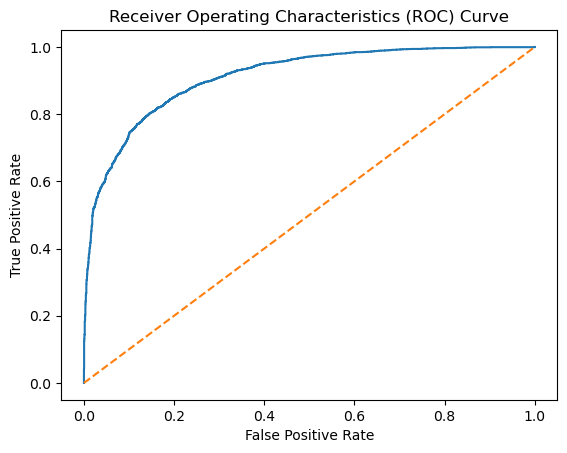

In [48]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.metrics import roc_curve

# Define true labels & predictions
true = y_test
predictions = lr_model.predict_proba(X_test)[:,1]

# Calculate the false positive rate, the true positive ratre, and the thresholds
fpr, tpr, thresholds = roc_curve(true, predictions)

# Plot the ROC curve
roc_plot = plt.plot(fpr, tpr)
roc_plot = plt.plot([0, 1], [0, 1], linestyle='--') # Diagonal line for reference
roc_plot = plt.xlabel('False Positive Rate')
roc_plot = plt.ylabel('True Positive Rate')
roc_plot = plt.title('Receiver Operating Characteristics (ROC) Curve')
roc_plot = plt.show()

In [49]:
y_test.to_numpy().reshape(-1,1)

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [50]:
predictions

array([0.00139276, 0.1740447 , 0.9933227 , ..., 0.02879778, 0.66061987,
       0.95858909])

In [51]:
lr_model.predict_proba(X_test)

array([[0.99860724, 0.00139276],
       [0.8259553 , 0.1740447 ],
       [0.0066773 , 0.9933227 ],
       ...,
       [0.97120222, 0.02879778],
       [0.33938013, 0.66061987],
       [0.04141091, 0.95858909]])

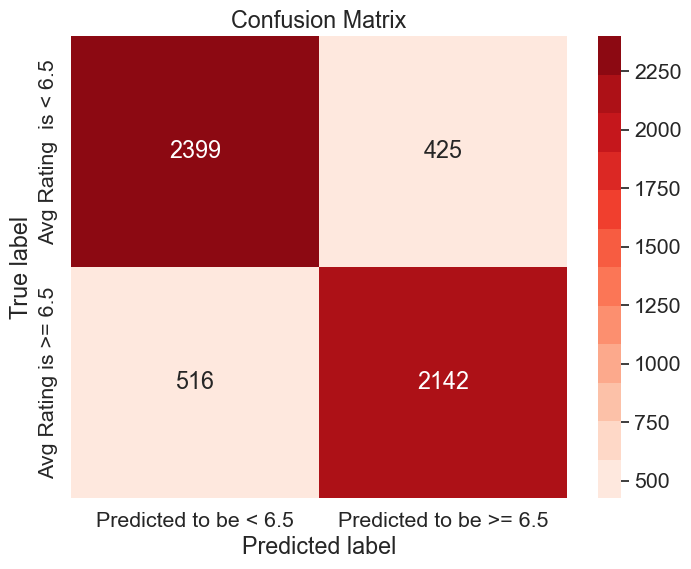

In [53]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the true and predicted labels
y_true = y_test 
y_pred = testing_predictions

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a dataframe from the confusion matrix
df_cm = pd.DataFrame(cm, index=['Avg Rating  is < 6.5', 'Avg Rating is >= 6.5'], columns=['Predicted to be < 6.5', 'Predicted to be >= 6.5'])

# Set the plot size and font scale
sns.set(font_scale=1.4)
plt.figure(figsize=(8,6))

# creating a colormap
colormap = sns.color_palette("Reds",12)

# Create a heatmap using seaborn
sns.heatmap(df_cm, annot=True, fmt='g', cmap=colormap)

# Set the plot title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [63]:
import matplotlib.pyplot as plt
import numpy as np

def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    from itertools import izip
    pc.update_scalarmappable()
    ax = pc.get_axes()
    #ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in izip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)


def main():
    sampleClassificationReport = testing_report

    plot_classification_report(sampleClassificationReport)
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()

In [64]:
main()

AttributeError: 'dict' object has no attribute 'split'

In [69]:
crdf = pd.DataFrame(testing_report).transpose()
crdf.rename(index={'0':'Games w/ AvgRating < 6.5'},inplace=True)
crdf.rename(index={'1':'Games w/ AvgRating >= 6.5'},inplace=True)
crdf

,precision,recall,f1-score,support
Games w/ AvgRating < 6.5,0.822985,0.849504,0.836034,2824.000000
Games w/ AvgRating >= 6.5,0.834437,0.805869,0.819904,2658.000000
accuracy,0.828347,0.828347,0.828347,0.828347
macro avg,0.828711,0.827687,0.827969,5482.000000
weighted avg,0.828537,0.828347,0.828213,5482.000000


<AxesSubplot:>

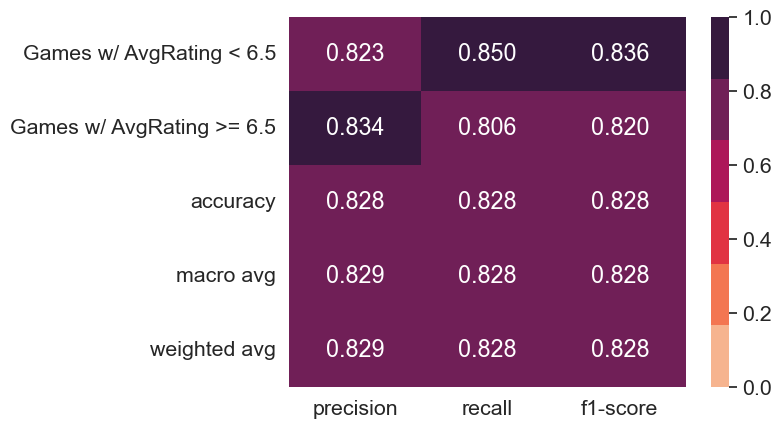

In [76]:
colormap = sns.color_palette("rocket_r")
sns.heatmap(crdf.iloc[:,:3], annot=True, fmt=".3f", vmin=0, vmax=1, cmap=colormap)


<AxesSubplot:>

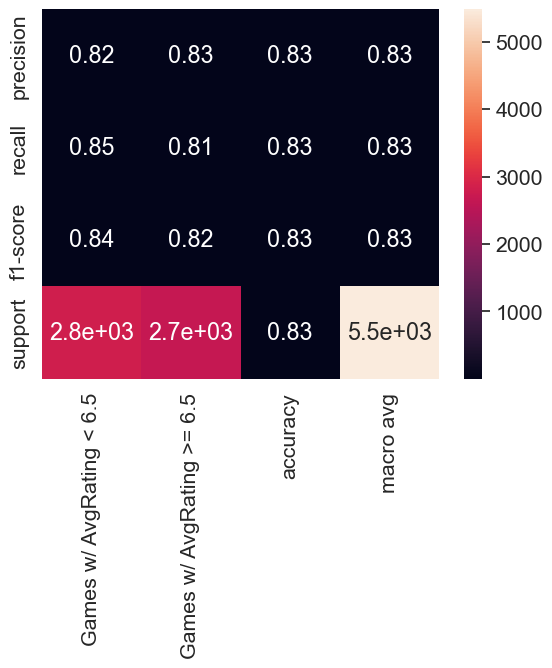

In [71]:
sns.heatmap(crdf.iloc[:-1, :].T, annot=True)